## 1. Importing the required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import scipy.optimize as optimization

## 2. Importing stocks from yahoo finance package

In [2]:
# Selecting the tickers
tickers_list = ['AMZN', 'UNH','BA','NKE', 'MSFT','NFLX','TSLA','AAPL','GOOGL']
# Setting the start and end date
start_date = '2015-01-01'
#Downloading the data via the Yohoo Finance API
stocks = yf.download(tickers_list,start_date)['Adj Close']
stocks_data = stocks.copy()
stocks_data

[*********************100%***********************]  9 of 9 completed


,AAPL,AMZN,BA,GOOGL,MSFT,NFLX,NKE,TSLA,UNH
Date,,,,,,,,,
2015-01-02,24.745998,308.519989,113.657234,529.549988,41.193825,49.848572,44.105816,43.862000,90.382698
2015-01-05,24.048859,302.190002,112.870041,519.460022,40.815022,47.311428,43.395714,42.018002,88.893959
2015-01-06,24.051128,295.290009,111.540619,506.640015,40.215977,46.501431,43.140442,42.256001,88.714607
2015-01-07,24.388372,298.420013,113.272385,505.149994,40.726913,46.742859,44.031559,42.189999,89.620377
2015-01-08,25.325432,300.459991,115.275284,506.910004,41.925034,47.779999,45.047997,42.124001,93.898270
...,...,...,...,...,...,...,...,...,...
2021-11-29,160.240005,3561.570068,198.500000,2910.610107,336.630005,663.840027,169.565231,1136.989990,450.530579
2021-11-30,165.300003,3507.070068,197.850006,2837.949951,330.589996,641.900024,168.936371,1144.760010,442.775848
2021-12-01,164.770004,3443.719971,188.190002,2821.030029,330.079987,617.770020,166.400925,1095.000000,442.895477


## 3. Random allotment of weights and total investment amount for portfolio

In [3]:
ticker_allocs = {'AMZN':0.13,'UNH':0.06,'BA':0.07,'NKE':0.09,'MSFT':0.05,'NFLX':0.12,'TSLA':0.06,'AAPL':0.07,'GOOGL':0.32}
total_inv_amount = 100000

In [4]:
for stock,alloc in ticker_allocs.items():
    stocks_data[stock] = stocks_data[stock]/stocks_data.iloc[0][stock]
    stocks_data[stock] = stocks_data[stock]*alloc
    stocks_data[stock] = stocks_data[stock]*total_inv_amount

## 4. Viewing the plots for the historical data of stocks with time

<AxesSubplot:xlabel='Date'>

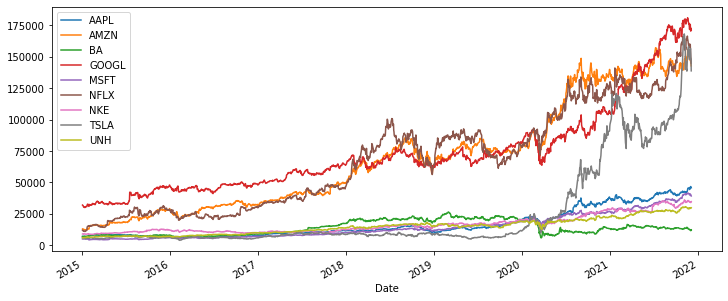

In [5]:
stocks_data.plot(figsize=(12,5),legend=True)

1. From the above plot we see that the Boeing stock(BA) has high volatality with a dip in the growth in the early 2020 time period.  
2. From the above plot we see that the Apple stock(AAPL) has minimum volatality with a continous growth in the studied time period of 2015 - 2021.

## 5. Calculating Expected Return & Expected Volatality on the stocks as as the percentage change over the studied time period

In [6]:
stock_returns = stocks_data.pct_change()
stock_returns

,AAPL,AMZN,BA,GOOGL,MSFT,NFLX,NKE,TSLA,UNH
Date,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.028172,-0.020517,-0.006926,-0.019054,-0.009196,-0.050897,-0.016100,-0.042041,-0.016472
2015-01-06,0.000094,-0.022833,-0.011778,-0.024679,-0.014677,-0.017121,-0.005882,0.005664,-0.002018
2015-01-07,0.014022,0.010600,0.015526,-0.002941,0.012705,0.005192,0.020656,-0.001562,0.010210
2015-01-08,0.038422,0.006836,0.017682,0.003484,0.029418,0.022188,0.023084,-0.001564,0.047733
...,...,...,...,...,...,...,...,...,...
2021-11-29,0.021874,0.016267,-0.003564,0.023544,0.021081,-0.002704,0.011010,0.050900,0.027483
2021-11-30,0.031578,-0.015302,-0.003275,-0.024964,-0.017943,-0.033050,-0.003709,0.006834,-0.017212
2021-12-01,-0.003206,-0.018064,-0.048825,-0.005962,-0.001543,-0.037592,-0.015008,-0.043468,0.000270


In [7]:
#Expected returns
stock_returns.mean()

AAPL     0.001245
AMZN     0.001555
BA       0.000665
GOOGL    0.001103
MSFT     0.001326
NFLX     0.001764
NKE      0.000924
TSLA     0.002403
UNH      0.001065
dtype: float64

In [8]:
# Volatility
stock_returns.std()

AAPL     0.018271
AMZN     0.019009
BA       0.026269
GOOGL    0.016702
MSFT     0.016977
NFLX     0.026008
NKE      0.017303
TSLA     0.034689
UNH      0.016973
dtype: float64

## 6. Analyzing the expected stock returns over time

<AxesSubplot:xlabel='Date'>

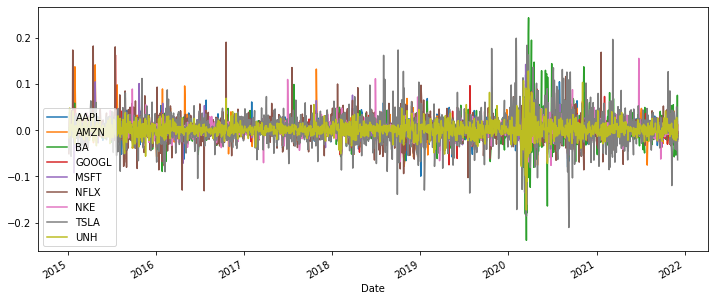

In [9]:
stock_returns.plot(figsize=(12,5),legend=True)

## 7. Calculating the weights on the expected returns

In [10]:
weights = np.random.random(len(tickers_list))
weights /= np.sum(weights)
weights

array([0.02734435, 0.06692406, 0.10193717, 0.07708839, 0.05627666,
       0.29784362, 0.08164588, 0.19825356, 0.09268632])

In [11]:
#Expected returns with weights
def potrfolio_returns_weights(stock_returns, weights):
    exp_returns_portfolio = np.sum(stock_returns.mean()*weights)*252
    print("Expected Portfolio Return:", exp_returns_portfolio)


In [12]:
#Generating returns for portfolio with the weights assigned to the tickers_list
potrfolio_returns_weights(stock_returns, weights)

Expected Portfolio Return: 0.38848280719131006


## 7. Analyzing the covariance between stocks

In [13]:
#Covariance between stocks
stock_returns.cov()

,AAPL,AMZN,BA,GOOGL,MSFT,NFLX,NKE,TSLA,UNH
AAPL,0.000334,0.000193,0.000191,0.000183,0.000211,0.000195,0.000137,0.000240,0.000141
AMZN,0.000193,0.000361,0.000126,0.000203,0.000209,0.000256,0.000110,0.000230,0.000111
BA,0.000191,0.000126,0.000690,0.000173,0.000177,0.000140,0.000193,0.000257,0.000180
GOOGL,0.000183,0.000203,0.000173,0.000279,0.000206,0.000205,0.000128,0.000197,0.000133
MSFT,0.000211,0.000209,0.000177,0.000206,0.000288,0.000208,0.000141,0.000229,0.000149
NFLX,0.000195,0.000256,0.000140,0.000205,0.000208,0.000676,0.000127,0.000281,0.000137
NKE,0.000137,0.000110,0.000193,0.000128,0.000141,0.000127,0.000299,0.000168,0.000128
TSLA,0.000240,0.000230,0.000257,0.000197,0.000229,0.000281,0.000168,0.001203,0.000131
UNH,0.000141,0.000111,0.000180,0.000133,0.000149,0.000137,0.000128,0.000131,0.000288


In [14]:
np.sqrt(stock_returns.cov())

,AAPL,AMZN,BA,GOOGL,MSFT,NFLX,NKE,TSLA,UNH
AAPL,0.018271,0.013901,0.013811,0.013514,0.014536,0.013959,0.011696,0.015505,0.011888
AMZN,0.013901,0.019009,0.011239,0.014259,0.014456,0.016015,0.010477,0.015166,0.010521
BA,0.013811,0.011239,0.026269,0.013135,0.013290,0.011838,0.013908,0.016037,0.013409
GOOGL,0.013514,0.014259,0.013135,0.016702,0.014355,0.014311,0.011315,0.014046,0.011536
MSFT,0.014536,0.014456,0.013290,0.014355,0.016977,0.014420,0.011875,0.015141,0.012189
NFLX,0.013959,0.016015,0.011838,0.014311,0.014420,0.026008,0.011274,0.016755,0.011688
NKE,0.011696,0.010477,0.013908,0.011315,0.011875,0.011274,0.017303,0.012958,0.011296
TSLA,0.015505,0.015166,0.016037,0.014046,0.015141,0.016755,0.012958,0.034689,0.011433
UNH,0.011888,0.010521,0.013409,0.011536,0.012189,0.011688,0.011296,0.011433,0.016973


## 8. Calculating expected risk for the portfolio

In [15]:
def expected_portfolio_risk(stock_returns, weights):
    expected_variance_portfolio = np.sqrt(np.dot(weights.T, np.dot(stock_returns.cov()*252,weights)))
    print("Expected Risk:", expected_variance_portfolio)

In [16]:
expected_portfolio_risk(stock_returns,weights)

Expected Risk: 0.26702654240249574


In [17]:
stock_returns

,AAPL,AMZN,BA,GOOGL,MSFT,NFLX,NKE,TSLA,UNH
Date,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.028172,-0.020517,-0.006926,-0.019054,-0.009196,-0.050897,-0.016100,-0.042041,-0.016472
2015-01-06,0.000094,-0.022833,-0.011778,-0.024679,-0.014677,-0.017121,-0.005882,0.005664,-0.002018
2015-01-07,0.014022,0.010600,0.015526,-0.002941,0.012705,0.005192,0.020656,-0.001562,0.010210
2015-01-08,0.038422,0.006836,0.017682,0.003484,0.029418,0.022188,0.023084,-0.001564,0.047733
...,...,...,...,...,...,...,...,...,...
2021-11-29,0.021874,0.016267,-0.003564,0.023544,0.021081,-0.002704,0.011010,0.050900,0.027483
2021-11-30,0.031578,-0.015302,-0.003275,-0.024964,-0.017943,-0.033050,-0.003709,0.006834,-0.017212
2021-12-01,-0.003206,-0.018064,-0.048825,-0.005962,-0.001543,-0.037592,-0.015008,-0.043468,0.000270


## 9. Performing Monte Carlo Simulation for 50000 portfolios with the weights

In [18]:
# Monte Carlo Simulation
def monte_carlo_portfolios(weights, stock_returns):

    monte_carlo_returns = []
    monte_carlo_variance = []
    monte_carlo_sharpe = []
    risk_free_rate = 0.015


    for i in range(50000):
        weights = np.random.random(len(tickers_list))
        weights/=np.sum(weights)
        monte_carlo_returns.append(np.sum(stock_returns.mean()*weights)*252)
        monte_carlo_variance.append(np.sqrt(np.dot(weights.T,np.dot(stock_returns.cov()*252,weights))))
        monte_carlo_sharpe.append(monte_carlo_returns[i]-risk_free_rate/monte_carlo_variance[i])
        
    monte_carlo_returns = np.array(monte_carlo_returns)
    monte_carlo_variance = np.array(monte_carlo_variance)
    monte_carlo_sharpe = np.array(monte_carlo_sharpe)
    return monte_carlo_returns,monte_carlo_variance, monte_carlo_sharpe

In [19]:
monte_carlo_returns, monte_carlo_variance,monte_carlo_sharpe = monte_carlo_portfolios(weights,stock_returns)

In [20]:
monte_carlo_returns

array([0.3793849 , 0.34655516, 0.35445407, ..., 0.35955814, 0.36664788,
       0.35755248])

In [21]:
monte_carlo_variance

array([0.26644457, 0.22618489, 0.24178198, ..., 0.23824581, 0.2546082 ,
       0.24859443])

In [22]:
monte_carlo_sharpe

array([0.32308801, 0.28023773, 0.29241471, ..., 0.29659796, 0.30773383,
       0.29721324])

## 10. Analyzing the variance and returns estimated with the Monte Carlo Simulation

In [23]:
def plot_metrics_portfolios(monte_carlo_returns, monte_carlo_variance, monte_carlo_sharpe):
    plt.figure(figsize=(10,6))
    plt.scatter(monte_carlo_variance,monte_carlo_returns,c=monte_carlo_returns/monte_carlo_variance,marker='o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.scatter(monte_carlo_variance[ np.argmax(monte_carlo_sharpe)], monte_carlo_returns[np.argmax(monte_carlo_sharpe)], c='green', s=50, edgecolors='black');
    plt.scatter(monte_carlo_variance[np.argmin(monte_carlo_variance)], monte_carlo_returns[np.argmin(monte_carlo_variance)], c='red', s=50, edgecolors='black');
    plt.show()

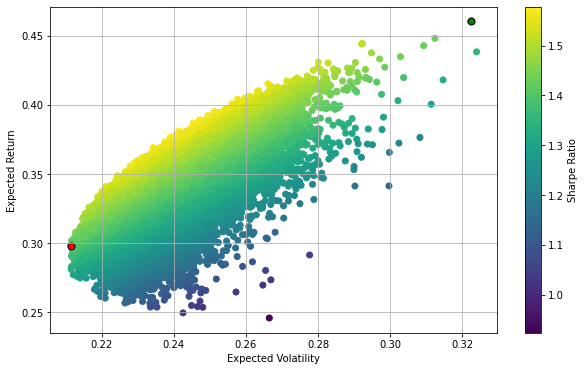

In [24]:
plot_metrics_portfolios(monte_carlo_returns, monte_carlo_variance, monte_carlo_sharpe)

In [25]:
def return_volatility_portfolio(weights, returns):
    portfolio_return=np.sum(returns.mean()*weights)*252
    portfolio_volatility=np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights)))
    return np.array([portfolio_return,portfolio_volatility,portfolio_return/portfolio_volatility])

In [26]:
def min_func_sharpe(weights,returns):
    return -return_volatility_portfolio(weights,returns)[2] 

In [27]:
def portfolio_vol(weights,returns):
    return return_volatility_portfolio(weights,returns)[1]

In [28]:
def optimize_portfolio(weights,returns):
    constraints = ({'type':'eq','fun': lambda x: np.sum(x)-1}) 
    bounds = tuple((0,1) for x in range(len(tickers_list))) 
    optimum_sharpe=optimization.minimize(fun=min_func_sharpe,x0=weights,args=returns,method='SLSQP',bounds=bounds,constraints=constraints) 
    return optimum_sharpe

In [29]:
def optimize_portfolio_vol(weights,returns):
    constraints = ({'type':'eq','fun': lambda x: np.sum(x)-1}) 
    bounds = tuple((0,1) for x in range(len(tickers_list))) 
    optimum_vol=optimization.minimize(fun=portfolio_vol,x0=weights,args=returns,method='SLSQP',bounds=bounds,constraints=constraints) 
    return optimum_vol

In [30]:
def print_detail_optimal_portfolio(optimum, returns):
    print("Optimal weights:", optimum['x'].round(3))
    print("Expected return, volatility and Sharpe ratio:", return_volatility_portfolio(optimum['x'].round(3),returns))

In [31]:
def show_plot_optimal_portfolio(optimum,optimum_vol, returns, preturns, pvariances):
    plt.figure(figsize=(10,6))
    plt.scatter(pvariances,preturns,c=preturns/pvariances,marker='o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.plot(return_volatility_portfolio(optimum['x'],returns)[1],return_volatility_portfolio(optimum['x'],returns)[0],'g*',markersize=20.0)
    plt.plot(return_volatility_portfolio(optimum_vol['x'],returns)[1],return_volatility_portfolio(optimum_vol['x'],returns)[0],'r*',markersize=20.0)
    plt.show()

## 11. Optimizing the Negative Sharpe Ratio and the Minimizing the Volatality for the optimal portfolio using Scipy's optimization package

Optimal weights: [0.016 0.314 0.    0.    0.102 0.119 0.063 0.161 0.225]
Expected return, volatility and Sharpe ratio: [0.38759044 0.24315851 1.59398259]


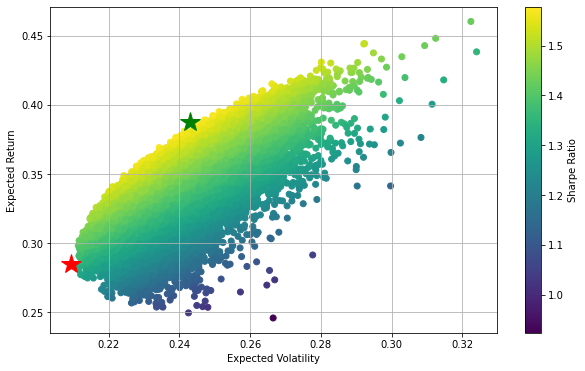

In [32]:
optimum_sharpe=optimize_portfolio(weights,stock_returns)
optimum_vol=optimize_portfolio_vol(weights,stock_returns)
print_detail_optimal_portfolio(optimum_sharpe, stock_returns)
show_plot_optimal_portfolio(optimum_sharpe,optimum_vol, stock_returns, monte_carlo_returns, monte_carlo_variance)

## 12. Analyzing the weight distribution across stocks for the optimal portfolio assignment

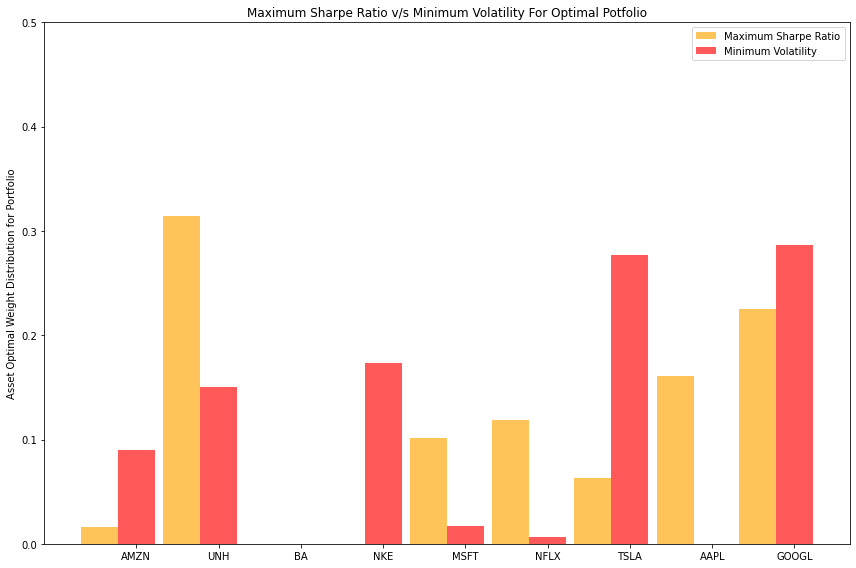

In [33]:
x_range = np.arange(len(tickers_list))
fig, axes = plt.subplots(figsize=(12,8))
bar_sharpe = axes.bar(x_range, optimum_sharpe['x'], 0.45, color='orange', alpha=0.65)
bar_volatality = axes.bar(x_range + 0.45, optimum_vol['x'], 0.45, color='red', alpha=0.65)
axes.set_ylabel('Asset Optimal Weight Distribution for Portfolio')
axes.set_ylim(0,0.5)
axes.set_title('Maximum Sharpe Ratio v/s Minimum Volatility For Optimal Potfolio')
axes.set_xticks(x_range + 0.45)
axes.set_xticklabels(tickers_list)
plt.tight_layout()
axes.legend((bar_sharpe[0], bar_volatality[0]), ('Maximum Sharpe Ratio', 'Minimum Volatility'))
plt.show()

In [34]:
def portfolio_weight_optimal_values(weights):
    optimal_stock = pd.DataFrame({"Stocks": tickers_list,"Optimal_Weights": weights})
    optimal_stock.Optimal_Weights = optimal_stock.Optimal_Weights.map(lambda x: '{:.3%}'.format(x))
    return optimal_stock

## 13. Optimized allocation of investment across stocks

In [35]:
portfolio_weight_optimal_values(optimum_sharpe['x'])

,Stocks,Optimal_Weights
0,AMZN,1.607%
1,UNH,31.388%
2,BA,0.000%
3,NKE,0.000%
4,MSFT,10.176%
5,NFLX,11.866%
6,TSLA,6.346%
7,AAPL,16.095%
8,GOOGL,22.521%
